# Uso de Dask para Procesar Datos Masivos



Dask es una biblioteca paralela y distribuida en Python que permite escalar cálculos comunes (como los de `pandas`, `numpy` o `scikit-learn`) a conjuntos de datos más grandes de los que pueden manejar estas herramientas directamente.

### Ventajas:
- Sintaxis similar a `pandas` y `numpy`
- Manejo eficiente de datos que no entran en memoria
- Paralelismo automático
- Integración con múltiples fuentes de datos



## Instalación

Si aún no tienes instalado `dask`, ejecuta:

In [ ]:
# ! pip install dask

También puedes instalarlo junto con otras dependencias útiles:

In [ ]:
# ! pip install "dask[dataframe]"

## Importar Librerías

In [ ]:

import dask.dataframe as dd
import pandas as pd
import numpy as n

## Cargar un dataset grande con Dask

Supongamos que tienes un archivo CSV muy grande. Con `dask.dataframe.read_csv()` puedes cargarlo sin necesidad de que entre todo en memoria:


In [56]:
small_csv="https://github.com/ricardoahumada/Python_for_Data_Science/raw/refs/heads/master/data/2008_small.zip"
big_csv="https://github.com/ricardoahumada/Python_for_Data_Science/raw/refs/heads/master/data/2008.zip"
very_small_csv = './data/2008_very_small.csv'

df = dd.read_csv(very_small_csv,dtype={'CancellationCode': 'object'})



> ✅ Nota: `dask.dataframe` tiene casi las mismas funciones que `pandas`.



## Verificar estructura del DataFrame

Como Dask trabaja de forma perezosa (*lazy evaluation*), no se ejecutan operaciones hasta que llamas a `.compute()`.

In [ ]:
df.head()  # Muestra las primeras filas


In [ ]:
df.columns  # Nombres de columnas

In [ ]:
df.dtypes   # Tipos de datos

## Operaciones básicas con Dask

### Filtrar datos

In [ ]:
filtered_df = df[df['ArrDelay'] > 3]
filtered_df.head()


### Seleccionar columnas



In [ ]:
subset = df[['Year', 'Month', 'DayofMonth', 'DayOfWeek']]
subset.head()


### Agregaciones



In [ ]:
promedio_DepDelay = df['DepDelay'].mean().compute()
print(f"Promedio de DepDelay: {promedio_DepDelay:.2f}")


### Agrupamiento



In [ ]:
grouped = df.groupby('Origin')['DepDelay'].mean().compute()
print(grouped)

## Optimización de tipos de datos

Puedes convertir columnas a tipos más ligeros, como `category`:

In [ ]:
df.columns

In [ ]:
df['Origin'] = df['Origin'].astype('category')


O también puedes especificar los tipos al cargar:



In [ ]:
dtypes = {
    'AirTime': np.int32,
    'Origin': str,
    'Year': np.int8,
    'ArrDelay': np.float32,
    'CancellationCode': 'category'
}

df = dd.read_csv(very_small_csv, dtype=dtypes)

df.info()


## Eliminar columnas innecesarias

In [ ]:

df = df.drop(['Unnamed: 0','FlightNum','CancellationCode'], axis=1)

## Particionar los datos

Dask divide automáticamente los datos en particiones. Puedes ver cuántas hay:

In [ ]:
print(df.npartitions)


Cambiar número de particiones (útil para optimizar rendimiento):



In [ ]:
df = df.repartition(npartitions=10)
print(df.npartitions)

## Guardar resultados procesados

Después de aplicar transformaciones, puedes guardar el resultado:

In [ ]:
df.to_csv("./output/resultado_procesado.csv", compute=True)


> Esto guardará archivos por partición: `resultado_procesado_0.csv`, `resultado_procesado_1.csv`, etc.



## Comparación con Pandas

Para ver la diferencia, carga el mismo archivo con `pandas`:

In [ ]:
try:
    df_pandas = pd.read_csv(big_csv)
    print("Cargado con pandas")
except MemoryError:
    print("Archivo demasiado grande para pandas")



Con `dask`:



In [ ]:
df_dask = dd.read_csv(big_csv)
print("Cargado con dask")

## Visualización básica

Puedes usar `matplotlib` o `seaborn` con `.compute()` para graficar:


In [55]:
df = dd.read_csv(very_small_csv,dtype={'CancellationCode': 'object'})

NameError: name 'very_small_csv' is not defined

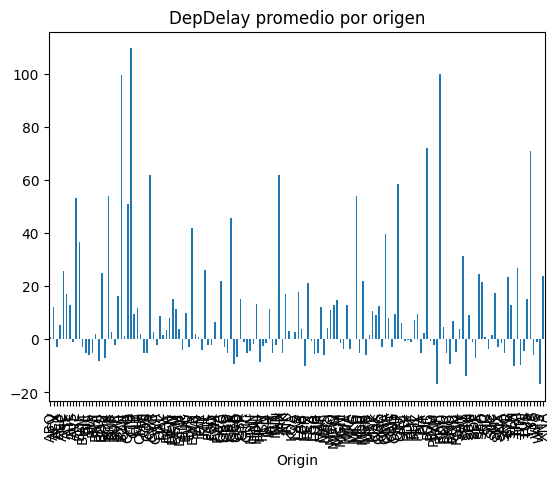

In [58]:
import matplotlib.pyplot as plt

df.groupby('Origin')['DepDelay'].mean().compute().plot(kind='bar')
plt.title("DepDelay promedio por origen")
plt.show()



## Resumen de diferencias clave: `dask.dataframe` vs `pandas`

| Característica | `pandas` | `dask.dataframe` |
|----------------|----------|------------------|
| Tamaño máximo de datos | Menor que la RAM disponible | Mayor que la RAM |
| Evaluación | Inmediata | Lazy (solo con `.compute()`) |
| Velocidad | Rápido para datasets pequeños | Más lento por operación, pero escalable |
| Paralelismo | No | Sí, usa múltiples núcleos |
| API | Idéntica | Similar, pero no totalmente compatible |



## Más información

- [Documentación oficial de Dask](https://docs.dask.org/en/stable/)
- [Dask + Pandas Tutorial](https://tutorial.dask.org/01x_dask_collections.html)
- [Dask ML Docs](https://ml.dask.org/)
- [Comparación Dask vs Spark](https://coiled.io/blog/dask-vs-spark/)

